In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [118]:
train=pd.read_csv('titanic_train.csv')

In [119]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


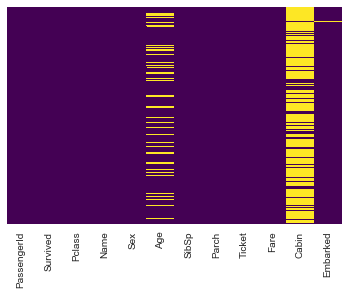

In [120]:
sns.heatmap(train.isnull(), yticklabels=False,cbar=False,cmap='viridis')

In [121]:
sns.heatmap

<function seaborn.matrix.heatmap(data, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g', annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)>

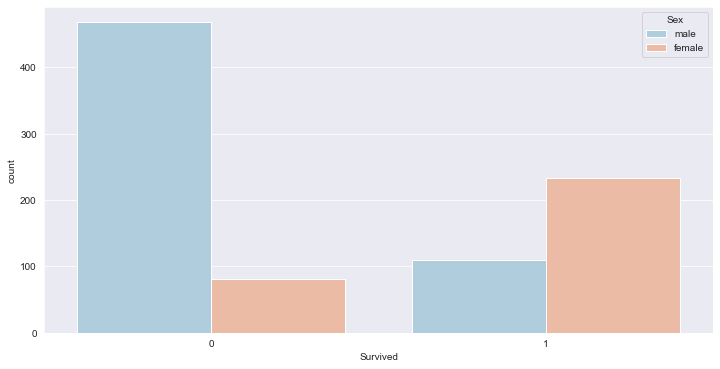

In [122]:
plt.figure(figsize=(12,6))
sns.set_style('darkgrid')
sns.countplot(x='Survived',data=train,palette='RdBu_r',hue='Sex')

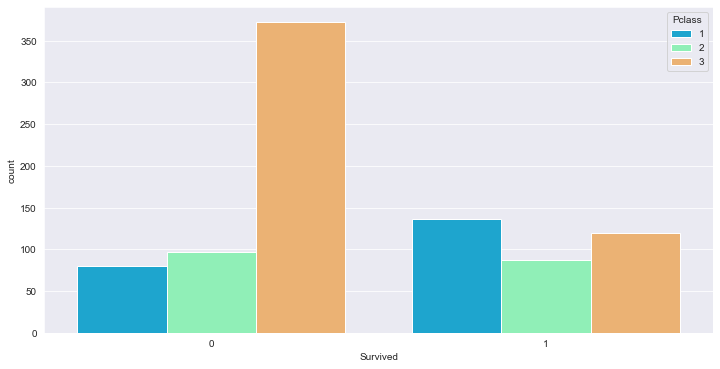

In [7]:
plt.figure(figsize=(12,6))
sns.countplot(x='Survived',hue='Pclass',data=train,palette='rainbow')

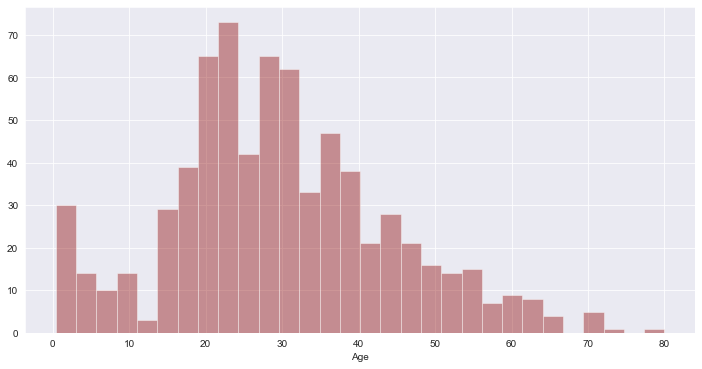

In [19]:
plt.figure(figsize=(12,6))
sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=30)

(array([30., 14., 10., 14.,  3., 29., 39., 65., 73., 42., 65., 62., 33.,
        47., 38., 21., 28., 21., 16., 14., 15.,  7.,  9.,  8.,  4.,  0.,
         5.,  1.,  0.,  1.]),
 array([ 0.42      ,  3.07266667,  5.72533333,  8.378     , 11.03066667,
        13.68333333, 16.336     , 18.98866667, 21.64133333, 24.294     ,
        26.94666667, 29.59933333, 32.252     , 34.90466667, 37.55733333,
        40.21      , 42.86266667, 45.51533333, 48.168     , 50.82066667,
        53.47333333, 56.126     , 58.77866667, 61.43133333, 64.084     ,
        66.73666667, 69.38933333, 72.042     , 74.69466667, 77.34733333,
        80.        ]),
 <a list of 30 Patch objects>)

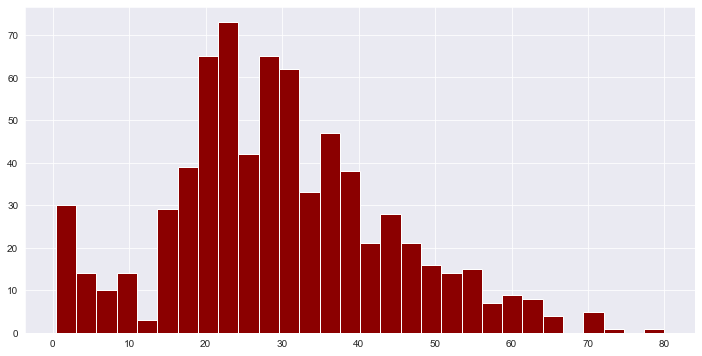

In [9]:
plt.figure(figsize=(12,6))
plt.hist(train['Age'].dropna(),color='darkred',bins=30)

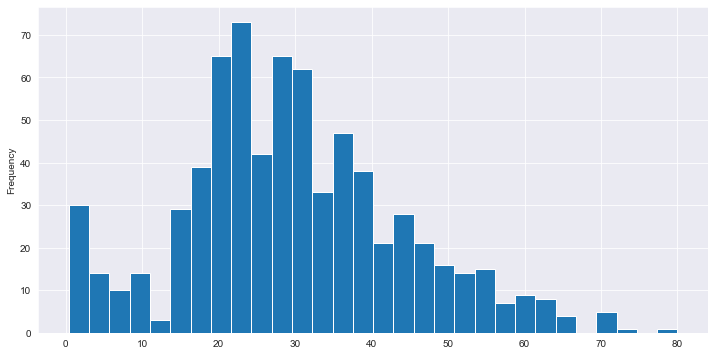

In [10]:
plt.figure(figsize=(12,6))
train['Age'].dropna().plot.hist(bins=30)

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [12]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


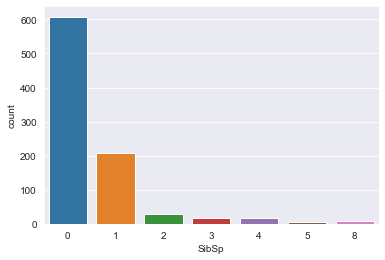

In [13]:
sns.countplot(x='SibSp',data=train)

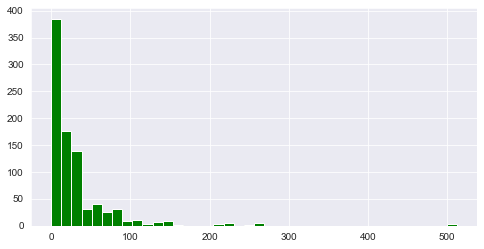

In [14]:
train['Fare'].hist(color='green',bins=40,figsize=(8,4))

In [15]:
import cufflinks as cf
cf.go_offline()

In [16]:
train['Fare'].iplot(kind='hist',bins=30,color='green')

In [22]:
plt.figure(figsize=(12, 7))
train[['Age']].iplot(kind='box')

<Figure size 864x504 with 0 Axes>

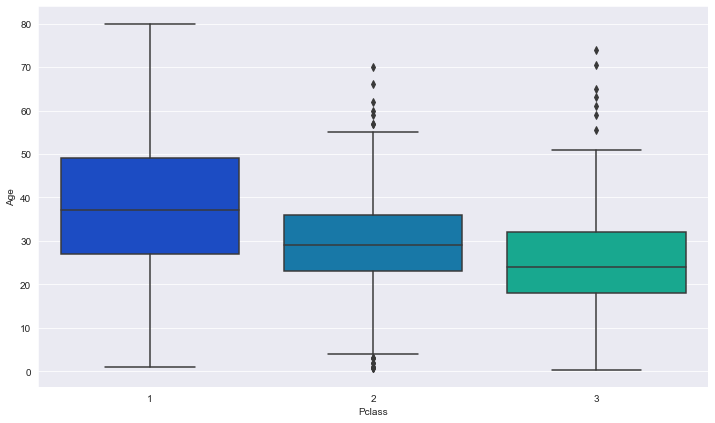

In [24]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age',data=train,palette='winter')

In [33]:
train[train['Pclass']==1]['Age'].mean()

38.233440860215055

In [34]:
train[train['Pclass']==2]['Age'].mean()

29.87763005780347

In [35]:
train[train['Pclass']==3]['Age'].mean()

25.14061971830986

In [123]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    
    if pd.isnull(Age):

        if Pclass == 1:
            return 38

        elif Pclass == 2:
            return 30

        else:
            return 25

    else:
        return Age

In [43]:
p=[train['Age'],train['Pclass']]

In [44]:

p[0]

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
5       NaN
6      54.0
7       2.0
8      27.0
9      14.0
10      4.0
11     58.0
12     20.0
13     39.0
14     14.0
15     55.0
16      2.0
17      NaN
18     31.0
19      NaN
20     35.0
21     34.0
22     15.0
23     28.0
24      8.0
25     38.0
26      NaN
27     19.0
28      NaN
29      NaN
       ... 
861    21.0
862    48.0
863     NaN
864    24.0
865    42.0
866    27.0
867    31.0
868     NaN
869     4.0
870    26.0
871    47.0
872    33.0
873    47.0
874    28.0
875    15.0
876    20.0
877    19.0
878     NaN
879    56.0
880    25.0
881    33.0
882    22.0
883    28.0
884    25.0
885    39.0
886    27.0
887    19.0
888     NaN
889    26.0
890    32.0
Name: Age, Length: 891, dtype: float64

In [124]:
train['Age'] = train[['Age','Pclass']].apply(impute_age,axis=1)

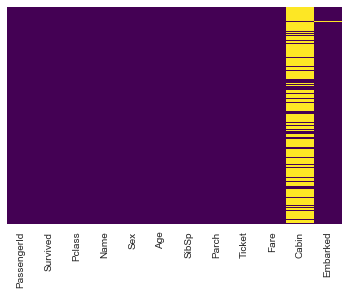

In [125]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [126]:
train.drop('Cabin',axis=1,inplace=True)

In [48]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


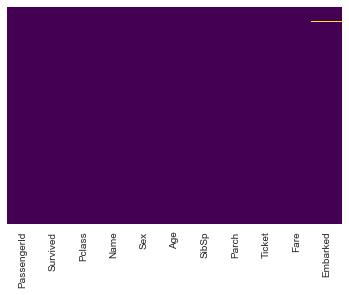

In [127]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [128]:
train.dropna(inplace=True)

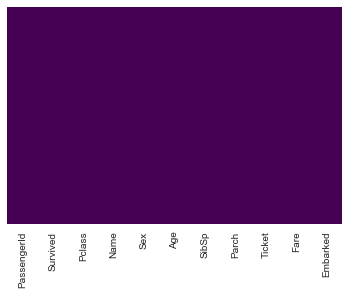

In [129]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [130]:
pd.get_dummies(train['Sex'])

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
5,0,1
6,0,1
7,0,1
8,1,0
9,1,0


In [131]:
sex = pd.get_dummies(train['Sex'],drop_first=True)

In [58]:
sex

,male
0,1
1,0
2,0
3,0
4,1
5,1
6,1
7,1
8,0
9,0


In [59]:
pd.get_dummies(train['Embarked'])

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
5,0,1,0
6,0,0,1
7,0,0,1
8,0,0,1
9,1,0,0


In [133]:
embark = pd.get_dummies(train['Embarked'],drop_first=True)

In [134]:
pclass = pd.get_dummies(train['Pclass'],drop_first=True)

In [135]:
train.drop(['Sex','Embarked','Ticket','Name','Pclass'],axis=1,inplace=True)

In [136]:
train = pd.concat([train,sex,embark,pclass],axis=1)


In [73]:
train.drop(['male','Q','S'], axis=1,inplace=True)

In [137]:
train.head()

,PassengerId,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,1,0,22.0,1,0,7.2500,1,0,1,0,1
1,2,1,38.0,1,0,71.2833,0,0,0,0,0
2,3,1,26.0,0,0,7.9250,0,0,1,0,1
3,4,1,35.0,1,0,53.1000,0,0,1,0,0
4,5,0,35.0,0,0,8.0500,1,0,1,0,1


In [138]:
train.drop('PassengerId',axis=1,inplace=True)

In [78]:
train.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,0,3,22.0,1,0,7.2500,1,0,1
1,1,1,38.0,1,0,71.2833,0,0,0
2,1,3,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,0,3,35.0,0,0,8.0500,1,0,1


In [139]:
from sklearn.model_selection import train_test_split

In [140]:
X=train.drop('Survived',axis=1)

In [141]:
y=train['Survived']

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=101)

In [106]:
y_test

511    0
613    0
615    1
337    1
718    0
152    0
826    0
418    0
614    0
241    1
747    1
291    1
656    0
128    1
868    0
640    0
269    1
496    1
142    1
321    0
158    0
490    0
185    0
110    0
480    0
724    1
139    0
657    0
7      0
238    0
      ..
476    0
327    1
734    0
760    0
808    0
226    1
762    1
866    1
598    0
636    0
85     1
24     0
546    1
603    0
754    1
270    0
728    0
722    0
873    0
90     0
414    1
197    0
84     1
259    1
819    0
792    0
828    1
732    0
669    1
634    0
Name: Survived, Length: 267, dtype: int64

In [143]:
from sklearn.linear_model import LogisticRegression

In [144]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

C:\Users\caiyi\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning:

Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [93]:
print(logmodel.intercept_)

[3.52463477]


In [96]:
logmodel.coef_

array([[-7.87009914e-01, -2.61808017e-02, -2.17524476e-01,
        -8.72426379e-02,  4.67849538e-03, -2.32185356e+00,
        -1.66549610e-03, -1.70089680e-01]])

In [97]:
X.columns,

(Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'male', 'Q', 'S'], dtype='object'),)

In [145]:
predictions = logmodel.predict(X_test)

In [146]:
from sklearn.metrics import classification_report

In [147]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.91      0.86       163
           1       0.83      0.65      0.73       104

   micro avg       0.81      0.81      0.81       267
   macro avg       0.82      0.78      0.79       267
weighted avg       0.81      0.81      0.81       267



In [112]:
y_test

511    0
613    0
615    1
337    1
718    0
152    0
826    0
418    0
614    0
241    1
747    1
291    1
656    0
128    1
868    0
640    0
269    1
496    1
142    1
321    0
158    0
490    0
185    0
110    0
480    0
724    1
139    0
657    0
7      0
238    0
      ..
476    0
327    1
734    0
760    0
808    0
226    1
762    1
866    1
598    0
636    0
85     1
24     0
546    1
603    0
754    1
270    0
728    0
722    0
873    0
90     0
414    1
197    0
84     1
259    1
819    0
792    0
828    1
732    0
669    1
634    0
Name: Survived, Length: 267, dtype: int64

In [113]:
predictions

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1], dtype=int64)